In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

# A simple model

From data we want to learn a function $f$: $$y = f(x)$$

For a simple model, the probability of voting for Romney is a function only of how religious the population in a county is.

So $x$ is the faction of religious people in a county and $y$ is the probability of voting for Romney as a function of $x$.

Because poll samples are finite, ther eis a margin of error on each data point $(x_i, y_i)$, but we ignore that for now.

In [8]:
df = pd.read_csv('../data/religion.csv')
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


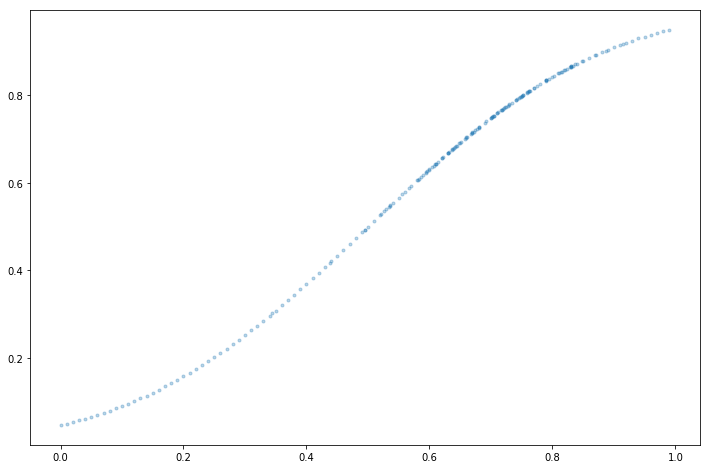

In [10]:
x = df.rfrac.values
f = df.promney.values
plt.plot(x,f, '.', alpha=0.3)

In general, we use only a part of our sample to train the model. Let's say out of 200 data points, we are given only 30 of them

In [31]:
np.random.seed(1)

In [32]:
# generate noisy sample
indexes = np.sort(np.random.choice(x.shape[0], size=30, replace=False))
dfsample = df.iloc[indexes]
# dfsample.to_csv('../data/noisysample.csv')
# dfsample = pd.read_csv('../data/noisysample.csv')
# dfsample.head()

In [35]:
samplex = x[indexes]
samplef = f[indexes]

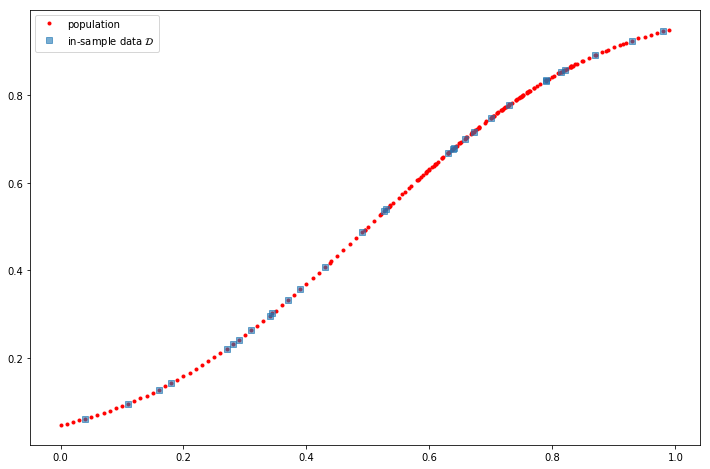

In [41]:
plt.plot(x, f, 'r.', label='population')
plt.plot(samplex, samplef, 's', alpha=0.6, label='in-sample data $\cal{D}$')
plt.legend()

We assume there is a true $f$ to be discovered. But we will never know it. We can only make some scientific guess about $f$ using a small sample from the population.

Thus what we will be doing is trying to find functions that might have generated the 30 points of data that we can see in the hope that one of these functions might approximate f well, and provide us a **predictive model** for future data. This is known as **fitting** the data.

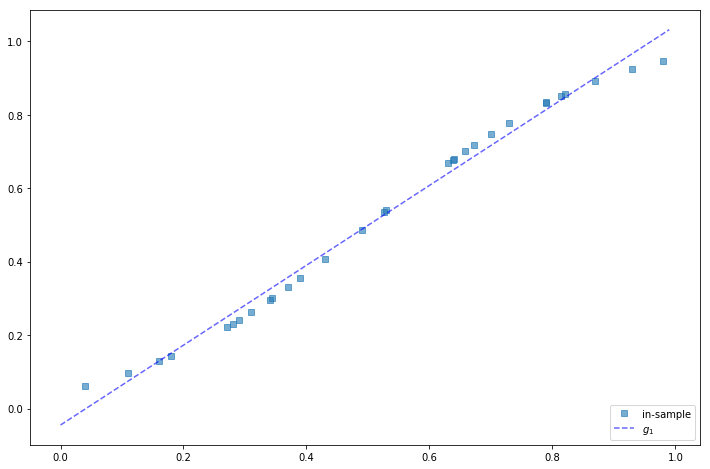

In [55]:
# best fit polynomial degree of 1. 
g1 = np.poly1d(np.polyfit(samplex, samplef, 1))
plt.plot(samplex, samplef, 's', alpha=0.6, label= 'in-sample')
plt.plot(x, g1(x), 'b--', alpha=0.6, label = '$g_1$')
plt.legend(loc=4)

The set of functions of a particular kind that we pick to fit our data against is called the hypothesis space $\cal{H}$

# Deterministic Error or Bias

![bias](gfx/bias.png)

When we approximate $f$ with $g$, there is going to be always error. The blue shade area shown in the above picture. This approximation error is called **bias**.

Let's try to approximate $f$ better by using a more complex hypothesis space. We will fit the data against a polynomial of degree 20.

In [58]:
g20 = np.poly1d(np.polyfit(samplex, samplef, 20))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


In [127]:
# uncomment to create a noisy poupluation and noisy sample of 30 points
# noisy population
noisypopdf = pd.DataFrame(data = x, columns=['x'])
noisypopdf['f'] = f
noisypopdf['y'] = noisypopdf.f + 0.1 * np.random.randn(*noisypopdf.f.shape)
noisypopdf.to_csv('../data/noisypopulation.csv', index=False)
# noisy sample
noisysample = noisypopdf.iloc[indexes].copy()
noisysample['i'] = indexes
noisysample.to_csv('../data/noisysample.csv', index=False)

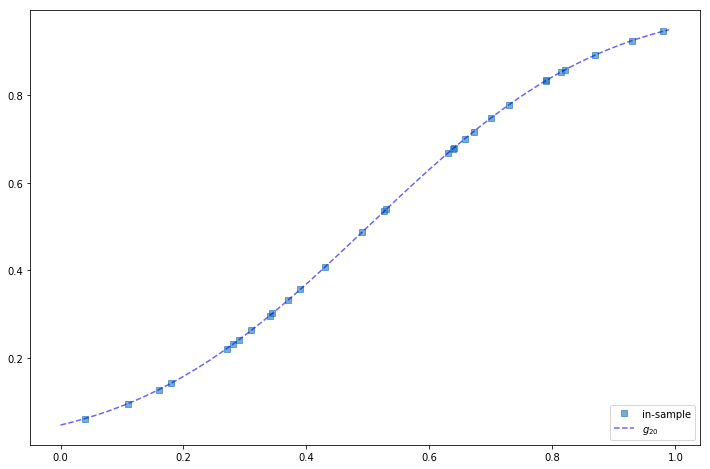

In [59]:
plt.plot(samplex, samplef, 's', alpha=0.6, label='in-sample')
plt.plot(x, g20(x), 'b--', alpha=0.6, label='$g_{20}$')
plt.legend(loc=4)

We see that g20 fits the data better. Let's quantify g1 and g20 bias by defining $bias(x) = (g(x) - f(x)) ^2$. We then plot this bias measure of the population of 200 points of our dataset.

In [62]:
bias1 = (g1(x) - f)**2
bias20 = (g20(x) - f)**2

Text(0.5,1,'Bias')

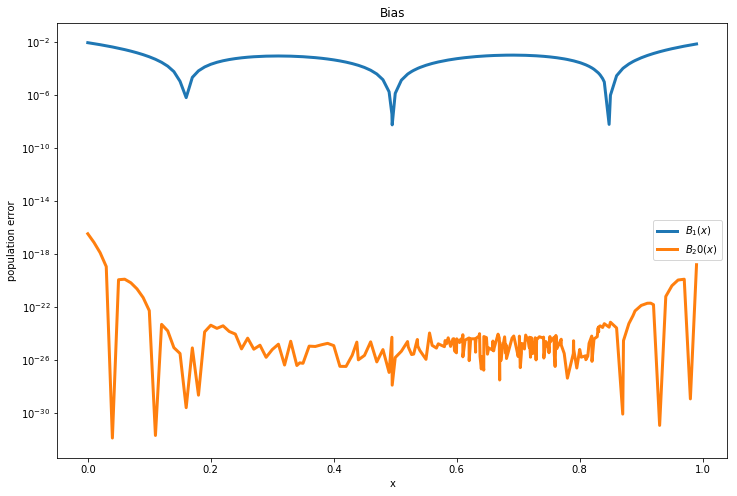

In [68]:
plt.plot(x, bias1, lw=3, label='$B_1(x)$')
plt.plot(x, bias20, lw=3, label='$B_20(x)$')
plt.xlabel('x')
plt.ylabel('population error')
plt.yscale('log')
plt.legend(loc='best')
plt.title('Bias')

We can see that the bias is much smaller for g20. How do we find out that g20 would be the best fit model in the first place. Let's answer this question in the following section.

# How to learn the best fit model in a hypothesis space.

Consider a particular hypothesis $h$, i.e., a polynomial. and some data points. Suppose we have them plotted as in the bellow figure.

![linreg](gfx/linreg.png)

The average of square of length of those vertical black segments are called **error functional** or **risk functional** or simply **error**. 

$$R_{\cal{D}}(h_i(x)) = \frac{1}{N}\sum_{y_i \in \cal{D}} (y_i - h(x_i))^2,$$

where $N$ is the number of data points in $\cal{D}$.

Now the best fit model $g \in \cal{H}$ will be found by performing minimization of errors. That is: $$g = \arg\min_{h \in \cal{H}}R_{\cal{D}}(h(x))$$

# The Structure of Learning

![basic structure](gfx/BasicModel.png)

When we learn a model, we minimize the risk, i.e., the in-sample error. What we are really after is to minize the cost if out-of-sample, on the population at large. But how can we mimize the out-of-sample cost if we never see out-of-sample points. This is where statistics come in to our picture.

We are drawing conclusions about a population from a sample, as usual in statistics.

In general, if our sample are representative of a population then our out-of-sample risk will not be so different from in-sample risk.

We write $g \approx f$, g is the **estimand** of $f$.
For example:

(0, 1)

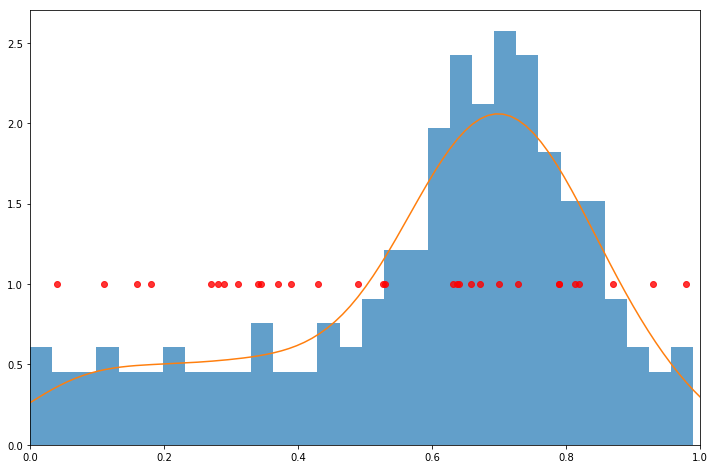

In [79]:
plt.hist(x, normed=True, bins=30, alpha=0.7)
sns.kdeplot(x)
plt.plot(samplex, [1.0]*len(indexes), 'o', alpha=0.8, color='r')
plt.xlim(0,1)

In our example, if we want a good $g$ for large x, or more religious counties, we would need a good sampling of ponts x closer to 1. And, similarly, the new x we are using to make predictions would also need to representative of those counties.  We wont do well if we try and predict low-religiousness counties from a sample of high-religiousness ones. Or, if we do want to predict over the entire range of religiousness, our training sample better cover all x
x
 well.

# The relation to the Law of Large Numbers

The process of minizing the risk above is called **Empirical Risk Minimization** (ERM). It is empirical because we minize it using empirical data. One can see this procedure in the eye of Law of Large Numbers

$$R_{out}(h) = E_{p(x)}[(h(x) - f(x))^2]$$

And this is approximated using Law of large numbers as 

$$R_{out}(h) = \lim_{n \rightarrow \infty} \sum_{x_i \sim p(x)} (h(x_i) - y_i)^2$$

As usuall, we have only access to $\cal{D}$. On the assumption that its representative (i.e. drawn from p(x)) we calculate:

$$R_{\cal{D}} = \frac{1}{N}\sum_{x_i \in \cal{D}}(h(x_i) - y_i)^2$$

# Statement of the learning problem

By optimizing in-sample risk, we hope it also select a hypothesis that minmize the risk on the whole population. Indeed in the above example, g20 does really well on the whole population

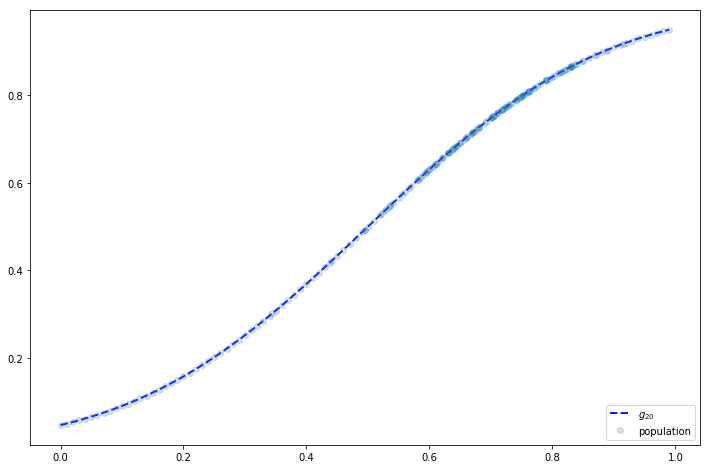

In [81]:
plt.plot(x,g20(x), 'b--', alpha=0.9, lw=2, label="$g_{20}$");
plt.plot(x,f, 'o', alpha=0.2, label="population");
plt.legend(loc=4);